# 이미지 분류 (합성곱신경망, CNN)
---
fashon-MNIST data set

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [54]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [55]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [56]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [57]:
## Label	Description
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

## 시각화

In [58]:
sample = np.random.randint(60000, size=9)
sample

array([39032, 32942, 28117, 57622, 34642,  2118, 42244, 49475, 54664])

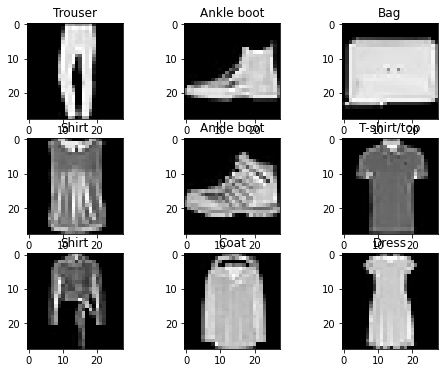

In [59]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(sample):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[idx], cmap='gray')
  # plt.xticks([])
  # plt.yticks([])
  plt.title(class_name[ y_train[idx]])
# i에는 번호가, idx에는 sample의 값들 (55246, ...)이 저장됨
plt.show()

## 검증용 데이터 (Validation Data)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

X_train.shape, X_val.shape, X_test.shape

((42000, 28, 28), (18000, 28, 28), (10000, 28, 28))

## 정규화

In [61]:
# MinMax 

X_train = X_train.astype('float32')/255.
X_val = X_val/255.
X_test = X_test/255.

In [62]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [63]:
y_train[:10]

array([4, 3, 8, 1, 3, 3, 0, 2, 1, 0], dtype=uint8)

In [64]:
# one-hot-encoding (다중분류)
from tensorflow.keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)
y_test_o = to_categorical(y_test)
y_train_o[:10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 모델

In [65]:
X_train.shape

(42000, 28, 28)

In [66]:
# flatten 할 필요 없음
# X_train = X_train.reshape(-1, 28*28)
# X_val = X_val.reshape(-1, 28*28)
# X_test = X_test.reshape(-1, 28*28)
# X_train.shape

In [67]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(42000, 28, 28, 1)

In [68]:
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [69]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Flatten(),

    layers.Dense(units=32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [71]:
X_val.shape, y_val_o.shape

((18000, 28, 28, 1), (18000, 10))

In [72]:
EPOCHS = 50
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val_o),
                verbose = 1)

Epoch 1/50
1313/1313 [==============================] - 48s 36ms/step - loss: 0.5832 - acc: 0.7895 - val_loss: 0.4173 - val_acc: 0.8516
Epoch 2/50
1313/1313 [==============================] - 46s 35ms/step - loss: 0.3776 - acc: 0.8659 - val_loss: 0.3355 - val_acc: 0.8800
Epoch 3/50
1313/1313 [==============================] - 44s 33ms/step - loss: 0.3306 - acc: 0.8806 - val_loss: 0.3077 - val_acc: 0.8889
Epoch 4/50
1313/1313 [==============================] - 45s 34ms/step - loss: 0.2956 - acc: 0.8917 - val_loss: 0.2891 - val_acc: 0.8948
Epoch 5/50
1313/1313 [==============================] - 45s 34ms/step - loss: 0.2727 - acc: 0.9007 - val_loss: 0.2934 - val_acc: 0.8946
Epoch 6/50
1313/1313 [==============================] - 44s 34ms/step - loss: 0.2480 - acc: 0.9092 - val_loss: 0.2611 - val_acc: 0.9067
Epoch 7/50
1313/1313 [==============================] - 44s 34ms/step - loss: 0.2341 - acc: 0.9143 - val_loss: 0.2644 - val_acc: 0.9076
Epoch 8/50
1313/1313 [==========================

In [73]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

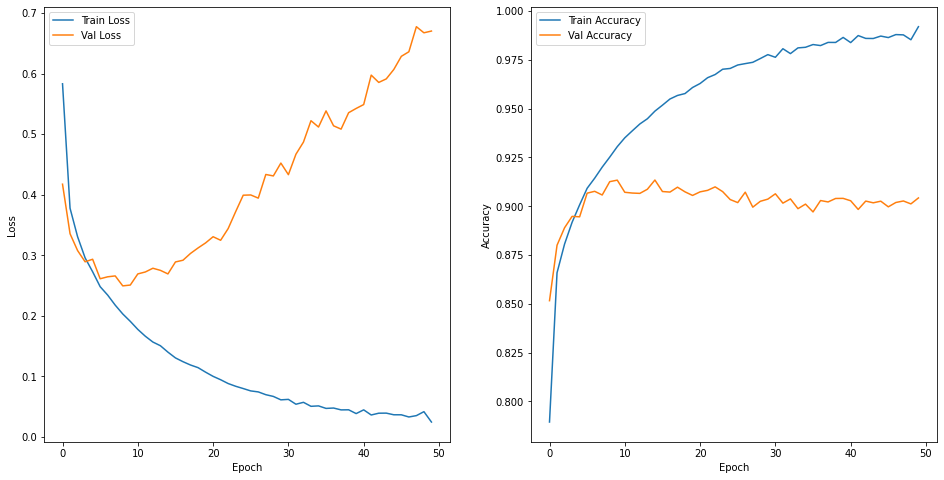

In [74]:
plot_history(log)

## 평가

In [75]:
model.evaluate(X_train, y_train_o)

1313/1313 [==============================] - 13s 10ms/step - loss: 0.0192 - acc: 0.9930


[0.019163766875863075, 0.9929524064064026]

In [76]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 3s 10ms/step - loss: 0.7422 - acc: 0.8977


[0.7421910166740417, 0.8977000117301941]

In [77]:
# 예측
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[2.24757816e-21, 4.68241250e-19, 3.04798913e-24, 5.91357695e-25,
        3.64113416e-34, 2.36875542e-13, 9.34246306e-14, 7.77157337e-14,
        6.05298016e-18, 9.99999940e-01],
       [3.62715240e-12, 0.00000000e+00, 9.99999940e-01, 2.34240078e-24,
        3.96259632e-23, 0.00000000e+00, 2.75411108e-17, 0.00000000e+00,
        2.12483917e-38, 2.17381306e-35],
       [3.06115680e-31, 9.99999940e-01, 8.78717233e-32, 4.35504314e-26,
        0.00000000e+00, 0.00000000e+00, 1.39749858e-27, 0.00000000e+00,
        0.00000000e+00, 3.96430842e-36],
       [6.90623502e-26, 9.99999940e-01, 1.79864343e-29, 6.33069232e-22,
        1.34971272e-31, 0.00000000e+00, 5.00958979e-24, 0.00000000e+00,
        8.69650816e-38, 0.00000000e+00],
       [2.49022822e-04, 4.36405587e-21, 6.97627854e-07, 3.09927292e-11,
        8.75653768e-06, 3.06878290e-16, 9.99741554e-01, 5.26665678e-25,
        1.12893645e-26, 1.28481839e-18]], dtype=float32)

In [78]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

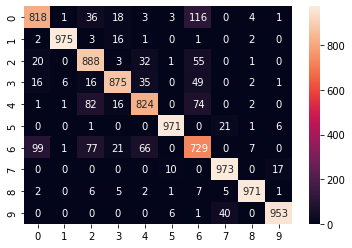

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='1')

### 오답 이미지 시각화

In [80]:
wrong = np.where((y_test == y_pred) == False)[0]
samples = np.random.choice(wrong, 9)
samples

array([1329,  688,  526, 6539, 5734, 3681, 1253, 2457, 3585])

In [81]:
X_test = X_test.reshape(-1,28,28)

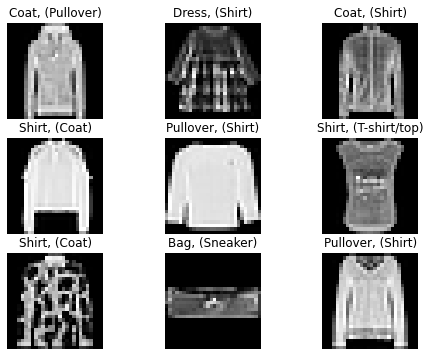

In [82]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[idx], cmap='gray')
  plt.axis('off')
  plt.title(f'{class_name[ y_test[idx]]}, ({class_name[ y_pred[idx]]})')
# i에는 번호가, idx에는 sample의 값들 (55246, ...)이 저장됨
plt.show()